# Problem 1
# Part (a) of question 1

In [66]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [67]:
def f1(t,y):
    return np.array([y[1],-4*np.pi*np.pi*y[0]])

In [68]:
def an(x):
    return -4*np.pi*np.pi*x

In [69]:
def rk4w(f,x,y,h):
    k1= h*f(x,y)
    k2=h* f(x+(h/2),y+ (k1/2))
    k3 = h*f(x+(h/2),y+(k2/2))
    k4= h*f(x+h,y+k3)
    return y + ((k1+2*k2+2*k3+k4)/6);


In [70]:
def verletw(a,y_int,xs,h): # Verlet Method
    y1 = y_int[0] + y_int[1]*h + (1/2)*(a(y_int[0]))*h*h # y1 has evaluated usingzzzzzzzz
    yv = np.zeros_like(xs)

    yv[1] = y1
    yv[0]= y_int[0]
    for i in range(2,len(xs)):
        yv[i] = 2*yv[i-1]-yv[i-2]+(a(yv[i-1]))*h*h
    return yv

def velverletw(a,y_int,xs,h): # Velocity Verlet Method
    ys = np.zeros_like(xs)
    vs = np.zeros_like(xs)
    ys[0]=y_int[0]
    vs[1]= y_int[1]
    for i in range(1,len(xs)):
        ys[i] = ys[i-1]+ (vs[i-1]*h) + (h*h/2)*a(ys[i-1])
        vs[i] = vs[i-1]+ (h/2)*(a(ys[i])+a(ys[i-1]))

    return (ys,vs)

In [71]:
def evaluate(method, fn, y_ini, xs, h):
    ys = np.zeros(shape=(len(xs),2))
    y = y_ini
    for i in range(len(xs)):
        x = xs[i]
        ys[i] = y
        y = method(fn, x, y, h)
    return ys

0.0


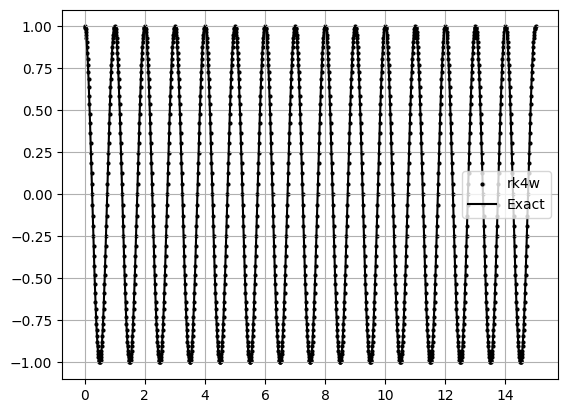

In [72]:
# Initial Conditions
h =0.01
tin=0.0
tfin= 15
ts = np.arange(tin,tfin+h,h)

yin= np.array([1.0,0.0])
print(yin[1])

s = evaluate(rk4w,f1,yin,ts,h)


plt.scatter(ts,[s[i][0] for i in range(len(ts))],color='black',s=4)

z = np.cos(2*m.pi*ts) # exact value function
plt.plot(ts,z,color='black')


plt.legend(["rk4w","Exact"])
plt.grid()



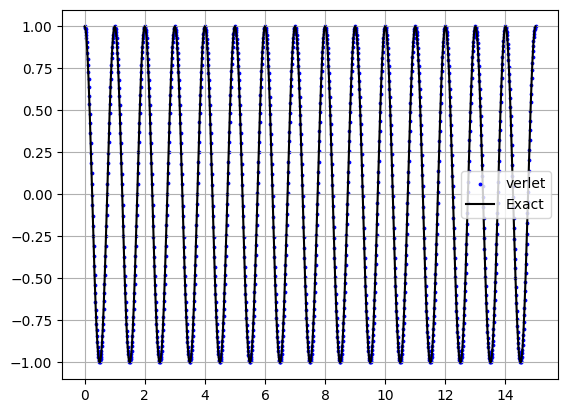

In [73]:
verletj = verletw(an,yin,ts,h)
plt.scatter(ts,verletj,color='blue',s=3)

z = np.cos(2*m.pi*ts) # exact value function
plt.plot(ts,z,color='black')

plt.legend(["verlet","Exact"])
plt.grid()

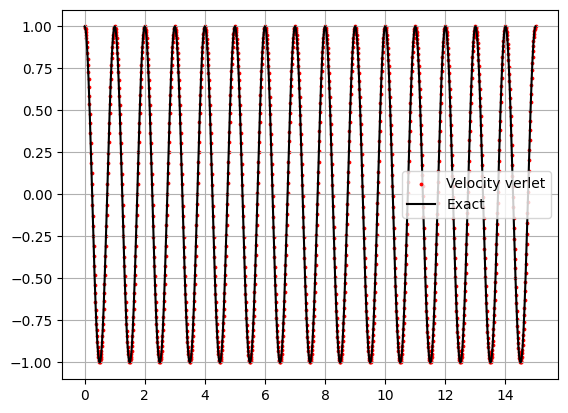

In [74]:
velverletj = velverletw(an,yin,ts,h)
plt.scatter(ts,velverletj[0],color='red',s=3)

z = np.cos(2*m.pi*ts) # exact value function
plt.plot(ts,z,color='black')

plt.legend(["Velocity verlet","Exact"])
plt.grid()

# Part (b) of question 1

In [75]:
t_in= 0
t_fin= 15
yin= np.array([1.0,0.0])

def exact_sol(x):
    return np.cos(2*np.pi*x);

n = np.arange(-4,-2+0.2,0.2)
h = np.power(10, n)

rk4_error = []
verlet_error = []
velver_error = []


for i in range(len(n)): # Evaluating errors from exact values for different methods.
    ts = np.arange(t_in,t_fin+h[i],h[i])

    rk44= evaluate(rk4w,f1,yin,ts,h[i])
    rk4_error.append(abs(exact_sol(ts[-1])-rk44[-1][0]))

    verlett= verletw(an,yin,ts,h[i])
    verlet_error.append(abs(exact_sol(ts[-1])-verlett[-1]))

    velverlett= verletw(an,yin,ts,h[i])
    velver_error.append(abs(exact_sol(ts[-1])-velverlett[-1]))

Matrix = np.array([n,h,rk4_error,verlet_error,velver_error])
Matrix = np.transpose(Matrix)
# print(Matrix) # If you want to see the table with more after decimal places, uncomment this line

headers = ['n','h','Rk4 Error','Verlet Error','Velocity Verlet Error']
table = tabulate(Matrix,headers,tablefmt='pipe',floatfmt=('.1f', '.6f', '.16f', '.16f','.16f'))
print(table)

|    n |        h |          Rk4 Error |       Verlet Error |   Velocity Verlet Error |
|-----:|---------:|-------------------:|-------------------:|------------------------:|
| -4.0 | 0.000100 | 0.0000000000000061 | 0.0000000000125870 |      0.0000000000125870 |
| -3.8 | 0.000158 | 0.0000000000000111 | 0.0000000015470000 |      0.0000000015470000 |
| -3.6 | 0.000251 | 0.0000000000000151 | 0.0000000143201812 |      0.0000000143201812 |
| -3.4 | 0.000398 | 0.0000000000000135 | 0.0000000435436769 |      0.0000000435436769 |
| -3.2 | 0.000631 | 0.0000000000001791 | 0.0000001492334392 |      0.0000001492334392 |
| -3.0 | 0.001000 | 0.0000000000063962 | 0.0000000120172031 |      0.0000000120172031 |
| -2.8 | 0.001585 | 0.0000000000148866 | 0.0000025572373542 |      0.0000025572373542 |
| -2.6 | 0.002512 | 0.0000000003391141 | 0.0000065376614306 |      0.0000065376614306 |
| -2.4 | 0.003981 | 0.0000000050990769 | 0.0000134905091750 |      0.0000134905091750 |
| -2.2 | 0.006310 | 0.0000000133

# Part (c) of question 1

Slope of fitting of Rk4 method: 4.16924127456209
Slope of fitting of Verlet method: 3.1672664163353867
Slope of fitting of Velocity Verlet method: 3.1672664163353867


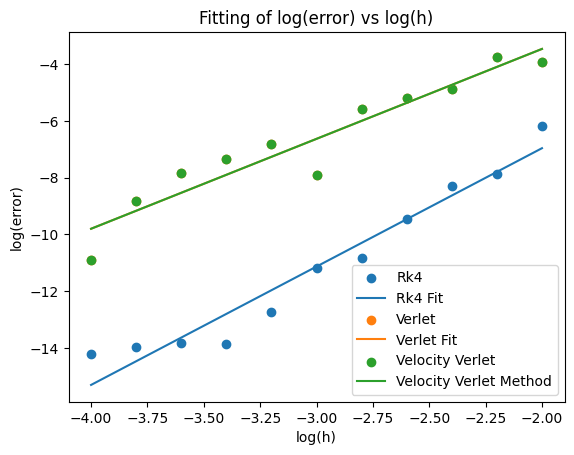

In [76]:
def eq_fit(x,p0,p1):
    return p0*x+p1

#Defining the function for fitting
logh= np.log10(h)
logeu_error= np.log10(rk4_error)
logmid_error= np.log10(verlet_error)
logvelo_error= np.log10(velver_error)

param1, cov1=curve_fit(eq_fit,logh, logeu_error, p0=[1.0,1.0]) # Fitting the euler method
plt.scatter(logh, logeu_error,label="Linear")
plt.plot(logh,eq_fit(logh,param1[0],param1[1]),label="Linear_fit")

param2, cov2=curve_fit(eq_fit,logh, logmid_error, p0=[1.0,1.0]) # Fitting the Midpoint method
plt.scatter(logh, logmid_error,label="Linear")
plt.plot(logh,eq_fit(logh,param2[0],param2[1]),label="Linear_fit")

param3, cov3=curve_fit(eq_fit,logh, logvelo_error, p0=[1.0,1.0]) # Fitting the Midpoint method
plt.scatter(logh, logvelo_error,label="Linear")
plt.plot(logh,eq_fit(logh,param3[0],param3[1]),label="Linear_fit")


plt.legend(["Rk4","Rk4 Fit","Verlet","Verlet Fit",'Velocity Verlet','Velocity Verlet Method'])
plt.title("Fitting of log(error) vs log(h)")
plt.xlabel('log(h)')
plt.ylabel('log(error)')

print(f"Slope of fitting of Rk4 method: {param1[0]}")
print(f"Slope of fitting of Verlet method: {param2[0]}")
print(f"Slope of fitting of Velocity Verlet method: {param3[0]}")


# Problem 2
# Part (a)
 $ m= 5kg, u = 10 m/s^2, \theta  = 60^{\circ}, a = 9.8 m/s^2, \gamma = 2 kg/s$ \\
In the x direction, there is no acceleration but in the y direction, there is a constant acceleration due to gravity.From this, we obtain two second order ODEs:

\begin{align}
  m\dfrac{d^2x}{dt^2} &= -\gamma\dfrac{dx}{dt} \\
  m\dfrac{d^2y}{dt^2} &= -mg - \gamma\dfrac{dy}{dt}
\end{align}
Equation of motion in terms of array is,
 $$ m\dfrac{d^{2}}{dt^{2}} \begin{pmatrix} x \\ y\end{pmatrix} = -\, m\begin{pmatrix} 0 \\ g\end{pmatrix} - \gamma\dfrac{d}{dt}\begin{pmatrix} x \\ y\end{pmatrix}$$

 Initial velocity along the x-direction, $x(t=0) = u cos(60^{\circ}) = 5 m/s$ and the y-direction, $ y(t=0) = usin(60^{\circ}) = 8.66 m/s$


We break these two second order equations into four first order equations.
\begin{align}
  \dfrac{dx}{dt} &= v_x, \quad
  \dfrac{dv_x}{dt} = - \frac{\gamma}{m} v_x \\
  \dfrac{dy}{dt} &=  v_y  \quad
  \dfrac{dv_y}{dt} =  -g - \frac{\gamma}{m} v_y \\
\end{align}


Here $v_x$ and $v_y$ are the velocity of particles along the $x$ and $y$ direction respectively.

In [77]:
def f2(t,y,gamma,m,g):
  return np.array([y[1],-(gamma/m)*y[1],y[3],-g-(gamma/m)*y[3]]) # it will provide 4d array of value

In [78]:
def eulerp(f1, x, y, h,gamma,m,g): # Euler Method
    return y + h*f1(x,y,gamma,m,g);

In [79]:
def rk4p(f,x,y,h,gamma,m,g): # Rk4 Method
    k1= h*f(x,y,gamma,m,g)
    k2=h* f(x+(h/2),y+ (k1/2),gamma,m,g)
    k3 = h*f(x+(h/2),y+(k2/2),gamma,m,g)
    k4= h*f(x+h,y+k3,gamma,m,g)
    return y + ((k1+2*k2+2*k3+k4)/6);

In [105]:
def evalp(method, fn, y_ini, xs, h,gamma,m,g):
    ys = np.zeros(shape=(len(xs),4))
    y = y_ini
    for i in range(len(xs)):
        if y[2]<0:
          return ys[:i]
        x = xs[i]
        ys[i] = y
        y = method(fn, x, y, h,gamma,m,g)

    return ys

In [ ]:
def evalp_velocity_verlet(fn, y_ini, xs, h, gamma, m, g):
    ys = np.zeros(shape=(len(xs), 4))
    y = y_ini

    for i in range(len(xs)):
        if y[2] < 0:
            return ys[:i]

        x = xs[i]
        ys[i] = y

        # Velocity Verlet algorithm
        a = fn(x, y, gamma, m, g)

        y_half = y + 0.5 * h * a
        a_half = fn(x + 0.5 * h, y_half, gamma, m, g)

        y = y + h * a_half
        ys[i] = y

    return ys

In [100]:
# I am using 4d array
# Parameters

m =2
theta = np.pi/3
g = 9.8
gamma = 2.0

# Initial Conditions
u = 10
v0 = np.array([0,u*np.cos(theta),0,u*np.sin(theta)]) # Initial positions and velocities in 4d array.

t_in =0
t_fin = 5
h =0.01 # Step Size
tx = np.arange(t_in, t_fin+h,h)


# Part (b) of question 2

Text(0, 0.5, 'y')

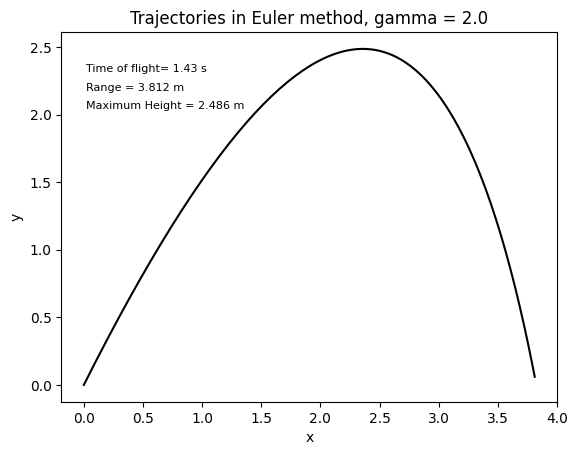

In [115]:
euller = evalp(eulerp,f2,v0,tx,h,gamma,m,g) # using 4d array of matrices
tx = tx[:len(euller)]

xeu = [euller[i][0] for i in range(len(tx))]
yeu = [euller[i][2] for i in range(len(tx))]
tau = tx[-1] # time of flight

for i in range(len(tx)):
  k = euller[i][3]
  if k <0: # checking where velocity along y direction become zero.
    H = euller[i][2] # Maximum Height gained by the particle
    break
R = xeu[-1]

plt.text(0.05, 0.9, f'Time of flight= {tau} s', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'Range = {np.round(R,4)} m', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f'Maximum Height = {np.round(H,3)} m', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)


plt.plot(xeu,yeu,color='black')
plt.title(f"Trajectories in Euler method, gamma = {gamma}")
plt.xlabel('x')
plt.ylabel('y')


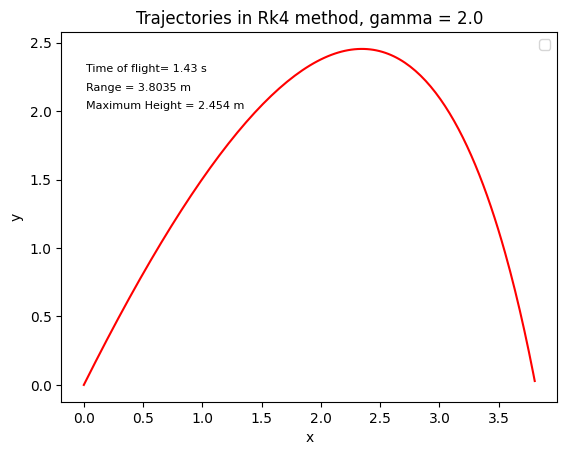

In [113]:
rkk4 = evalp(rk4p,f2,v0,tx,h,gamma,m,g)
tx = tx[:len(rkk4)]

xeur = [rkk4[i][0] for i in range(len(tx))]
yeur = [rkk4[i][2] for i in range(len(tx))]

taur = tx[-1] # time of flight


for i in range(len(tx)):
  k = rkk4[i][3]
  if k <0: # checking where velocity along y direction become zero.
    Hr = rkk4[i][2] # Maximum Height gained by the particle
    break
Rr = xeur[-1]

plt.plot(xeur,yeur,color='red')
plt.text(0.05, 0.9, f'Time of flight= {taur} s', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'Range = {np.round(Rr,4)} m', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f'Maximum Height = {np.round(Hr,3)} m', fontsize=8, ha='left', va='center', transform=plt.gca().transAxes)

plt.title(f"Trajectories in Rk4 method, gamma = {gamma}")
plt.xlabel('x')
plt.ylabel('y')


plt.legend()



# Part (c) of question 2

With increase of gamma value, time of flight is decreasing.


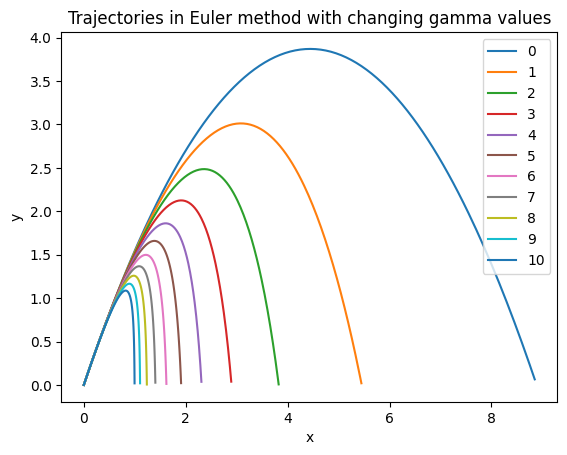

In [84]:
gamma_values = np.arange(0,10+1,1)


for gama in gamma_values:
    eulle = evalp(eulerp,f2,v0,tx,h,gama,m,g) # updating gamma value in every step
    yeup = []
    xeup=[]
    for i in range(len(tx)):
      kp = eulle[i][2]
      sp = eulle[i][0]
      if kp <0:
        break
      yeup.append(kp)
      xeup.append(sp)
    plt.plot(xeup,yeup) # Plotting graph for different values for gamma

plt.title("Trajectories in Euler method with changing gamma values")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(gamma_values)
print('With increase of gamma value, time of flight is decreasing.')

With increase of gamma value, time of flight and Range is decreasing.


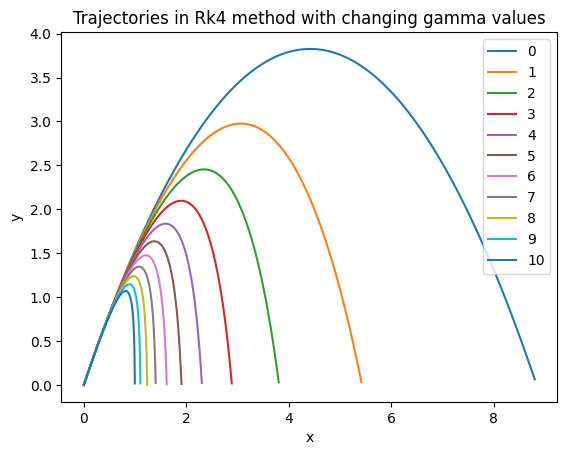

In [85]:
gamma_values = np.arange(0,10+1,1)

for gama in gamma_values:
    rrk4 = evalp(rk4p,f2,v0,tx,h,gama,m,g) # updating gamma value in every step
    yeus = []
    xeus=[]
    for i in range(len(tx)):
      ks = rrk4[i][2]
      ss = rrk4[i][0]
      if ks <0:
        break
      yeus.append(ks)
      xeus.append(ss)
    plt.plot(xeus, yeus) # Plotting graph for different values for gamma



plt.title("Trajectories in Rk4 method with changing gamma values")

plt.xlabel('x')
plt.ylabel('y')

plt.legend(gamma_values)
print('With increase of gamma value, time of flight and Range is decreasing.')
plt.show()